In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
bids = pd.read_csv("../data/uganda_22_bids.csv")

In [ ]:
# check
bids.info()

In [4]:
# lots of nulls, drop them
bids = bids.dropna()
bids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7345 entries, 0 to 19511
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   7345 non-null   int64  
 1   ocid                         7345 non-null   object 
 2   date                         7345 non-null   object 
 3   tag                          7345 non-null   object 
 4   bids_details_id              7345 non-null   float64
 5   bids_details_date            7345 non-null   object 
 6   bids_details_value_amount    7345 non-null   float64
 7   bids_details_value_currency  7345 non-null   object 
 8   bids_details_status          7345 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 573.8+ KB


In [5]:
# convert
bids.date = bids.date.astype("datetime64[ns]")
bids.ocid = bids.ocid.astype("string")
bids.tag = bids.tag.astype("string")
bids.bids_details_date = bids.bids_details_date.astype("datetime64[ns]")
bids.bids_details_value_currency = bids.bids_details_value_currency.astype("string")
bids.bids_details_status = bids.bids_details_status.astype("string")

In [6]:
#RQ1 = are all bid currencies the same?
pd.unique(bids.bids_details_value_currency)

<StringArray>
['UGX', 'USD', 'EUR', 'GBP', 'KES']
Length: 5, dtype: string

In [7]:
bids.bids_details_value_currency.value_counts()

UGX    7096
USD     224
EUR      12
KES       8
GBP       5
Name: bids_details_value_currency, dtype: Int64

In [8]:
#TODO lookup/convert to UGX

#for now we'll ignore those ones
bids_ugx = bids[bids.bids_details_value_currency == 'UGX']

In [ ]:
bids_ugx.describe()

In [10]:
pd.unique(bids.bids_details_status)
## all the same so can't tell us anything

<StringArray>
['valid']
Length: 1, dtype: string

In [11]:
pd.unique(bids.tag)
# all the same, should probably filter out at R time

<StringArray>
['compiled']
Length: 1, dtype: string

In [ ]:
bids = bids.drop(["tag", "bids_details_status"], axis=1)

In [36]:
bids = bids[["date", "bids_details_value_amount"]]

In [46]:
bids.head()

Index(['bids_details_value_amount'], dtype='object')

In [38]:
# time of bids / ammount
bids.set_index("date",drop=True,inplace=True)


In [ ]:
bids.plot( )

In [48]:
# top bids
bids.sort_values('bids_details_value_amount', ascending=False).head(30)

,bids_details_value_amount
date,
2022-06-27 06:00:08,7.401689e+11
2022-06-27 07:02:31,4.508214e+11
2022-06-28 06:16:02,3.947649e+11
2022-06-27 09:15:55,3.858594e+11
2022-04-01 08:40:11,3.573695e+11
2022-06-27 07:25:10,2.754640e+11
2022-06-21 09:35:08,2.610894e+11
2022-11-18 07:25:04,1.030062e+11
2022-06-21 08:21:18,5.290850e+10


<AxesSubplot:xlabel='date'>

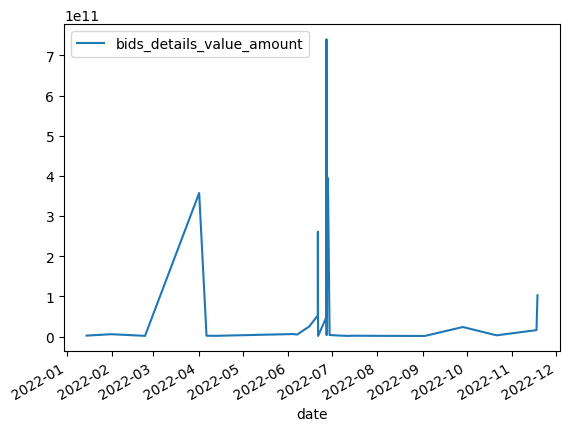

In [50]:
bids.sort_values('bids_details_value_amount', ascending=False).head(30).plot()

In [24]:
def plot_value_by_year(dataframe):
    dataframe.plot(x="bids_details_date", y="bids_details_value_amount", kind="scatter")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# output to /output
plt.savefig("../output/uganda_bids_ugx_incl_top.png")